**1) problem statement** 


This project understands how the student's performance(test scores) is affected by other variables such as Gender , Ethnicity , Parental level of education, Lunch and Test preparation course 

**2) Data Collection**

dataset source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

the dataset contains of 8 columns and 1000 rows

2.1 import data and required packages

importing pandas , numpy , matplotlib , seaborn and warning library

In [2]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

import the csv data as pandas dataframe

In [3]:
df = pd.read_csv("./data/dataset.csv")
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of the dataset

In [4]:
df.shape

(1000, 8)

2.2 Dataset infromation

**gender : sex of the students (male / female)**

**race/ethnicity : ethnicity of the students (Group A,B,C,D,E)**

**Parent level of education : parents' final education -> (bachelor's degree , some college , master's degree , associate degree , high school)**

**lunch : having lunch before test (standard or free/reduced)**

**test prepareation course: complete or not complete before test**

**math score**

**reading score**

**writing score**

**3. Data checks to perform**

**check missing values**

**check duplicates**

**check data type**

**check the number of the unqiue values of each column**

**check statics of data set**

**check various categories present in the different categorical column**

**3.1 check missing values**

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 check duplicates

In [6]:
df.duplicated().sum()

0

3.3 check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 check the number of unique value of the each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 check statics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("categories in gender variable  ",end=' ' )
print(df['gender'].unique())

print("categories in race_ethnicity  ",end=' ' )
print(df['race_ethnicity'].unique())

print("categories in parental_level_of_education variable  ",end=' ' )
print(df['parental_level_of_education'].unique())

print("categories in lunch variable  ",end=' ' )
print(df['lunch'].unique())


categories in gender variable   ['female' 'male']
categories in race_ethnicity   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable   ['standard' 'free/reduced']


In [11]:
#define numerical columns and categorical columns

numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print("we have {} numerical features : {}".format(len(numerical_features),(numerical_features) ))
print("we have {} categorical features : {}".format(len(categorical_features),(categorical_features) ))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total score and Average"

In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print("the number of students got full marks in reading",reading_full)
print("the number of students got full marks in writing",writing_full)
print("the number of students got full marks in math",math_full)

the number of students got full marks in reading 17
the number of students got full marks in writing 14
the number of students got full marks in math 7


In [14]:
reading_less = df[df['reading_score'] <= 20]['average'].count()
writing_less = df[df['writing_score'] <= 20]['average'].count()
math_less = df[df['math_score'] <= 20]['average'].count()


print(f"the number of students got fail marks in reading: {reading_less}")
print(f"the number of students got fail marks in writing: {writing_less}")
print(f"the number of students got fail marks in math: {math_less}")

the number of students got fail marks in reading: 1
the number of students got fail marks in writing: 3
the number of students got fail marks in math: 4


Visualization

Histogram & KDE

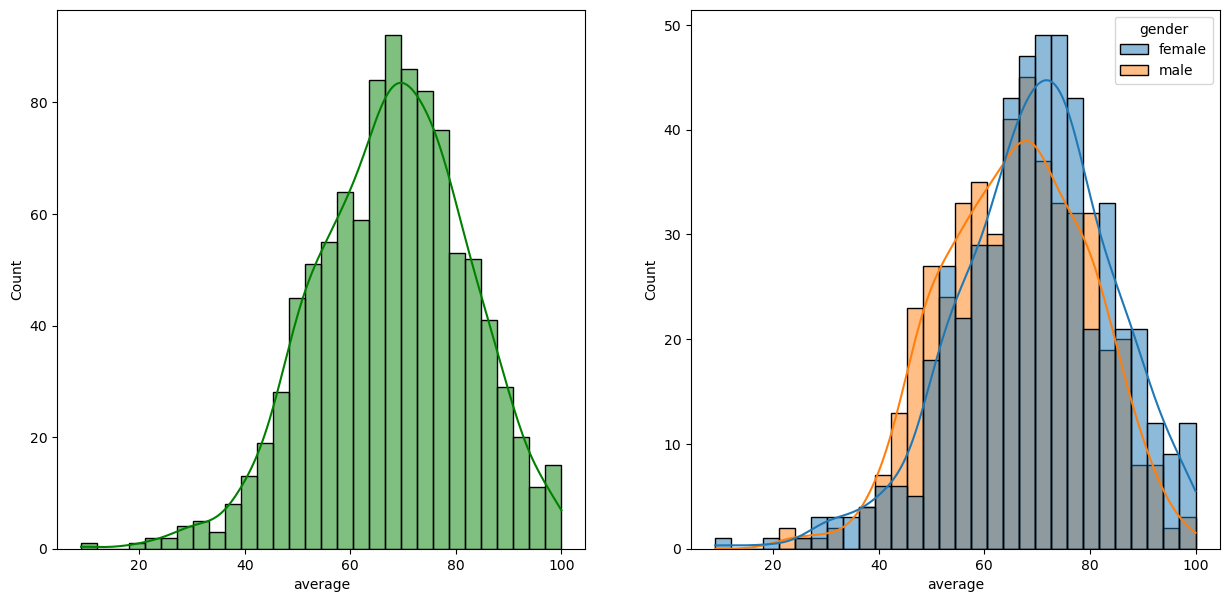

In [15]:
fig , ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

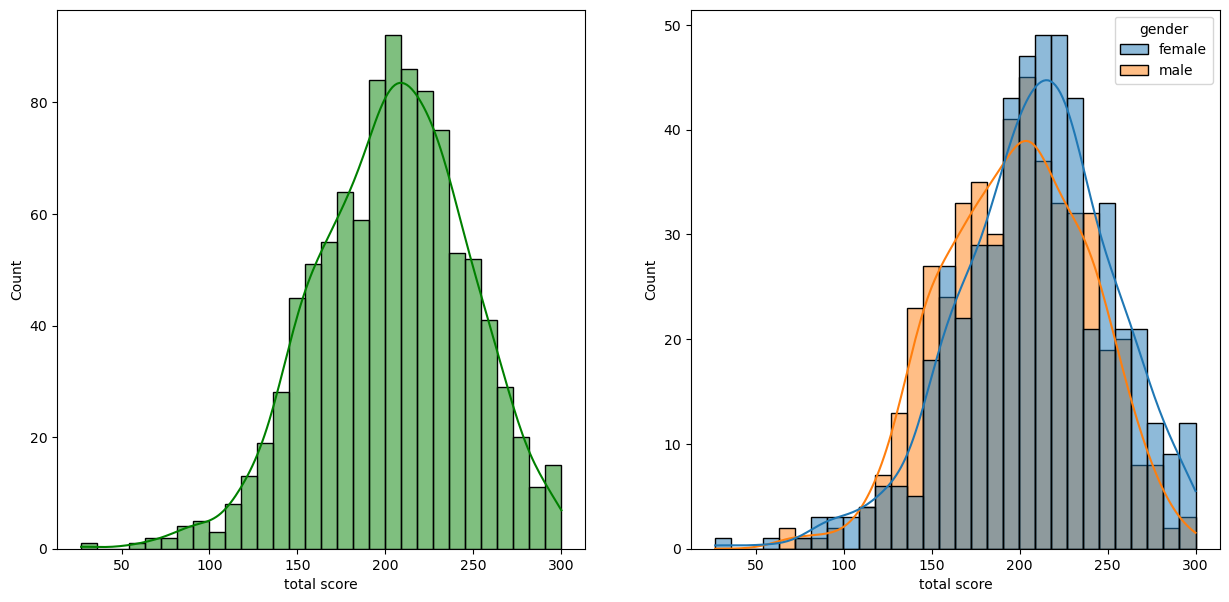

In [16]:
fig , ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,kde=True,hue='gender')
plt.show()

insights

female students tends to perform well than male students

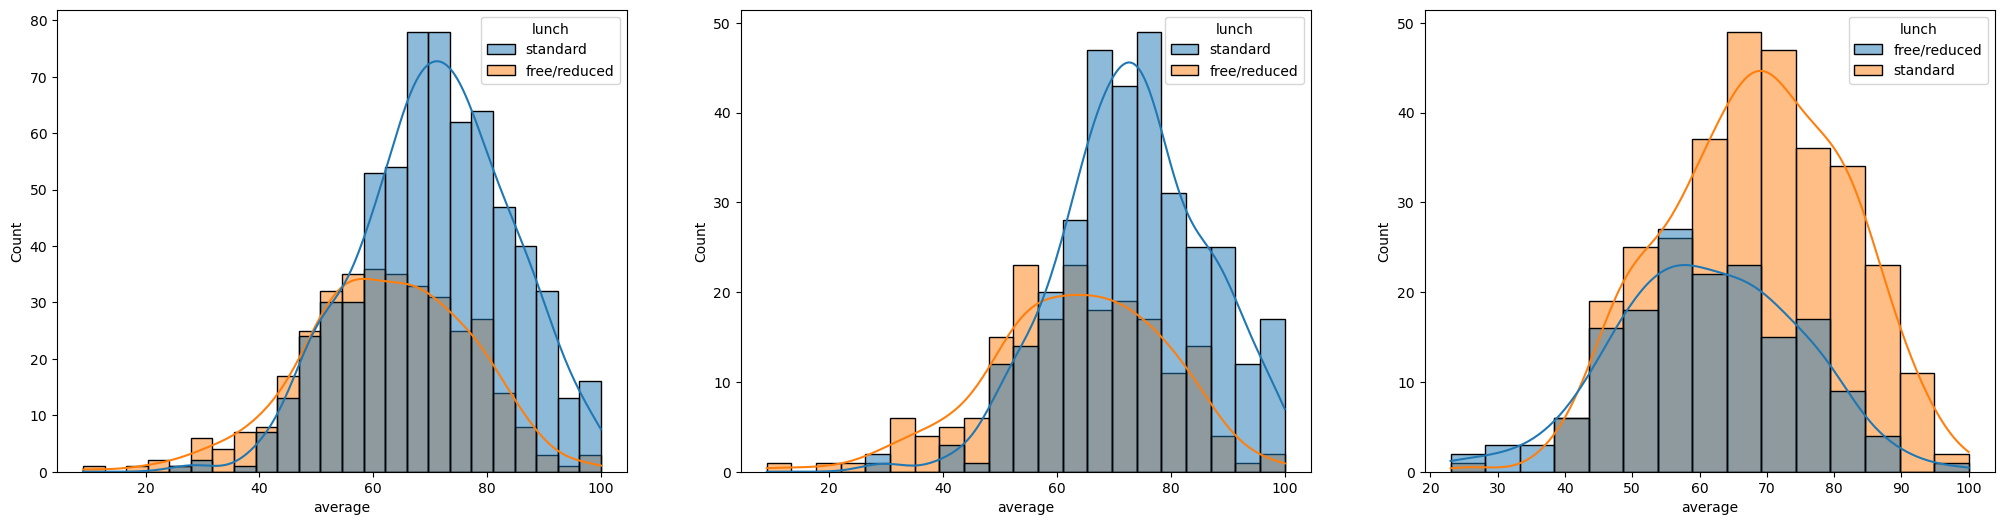

In [17]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data= df[df.gender == 'female'],x='average',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data= df[df.gender =='male'],x='average',hue='lunch',kde=True)
plt.show()

insights 

standared lunch helps perform well in exams


standared lunch helps perform well in exams be it as male or female

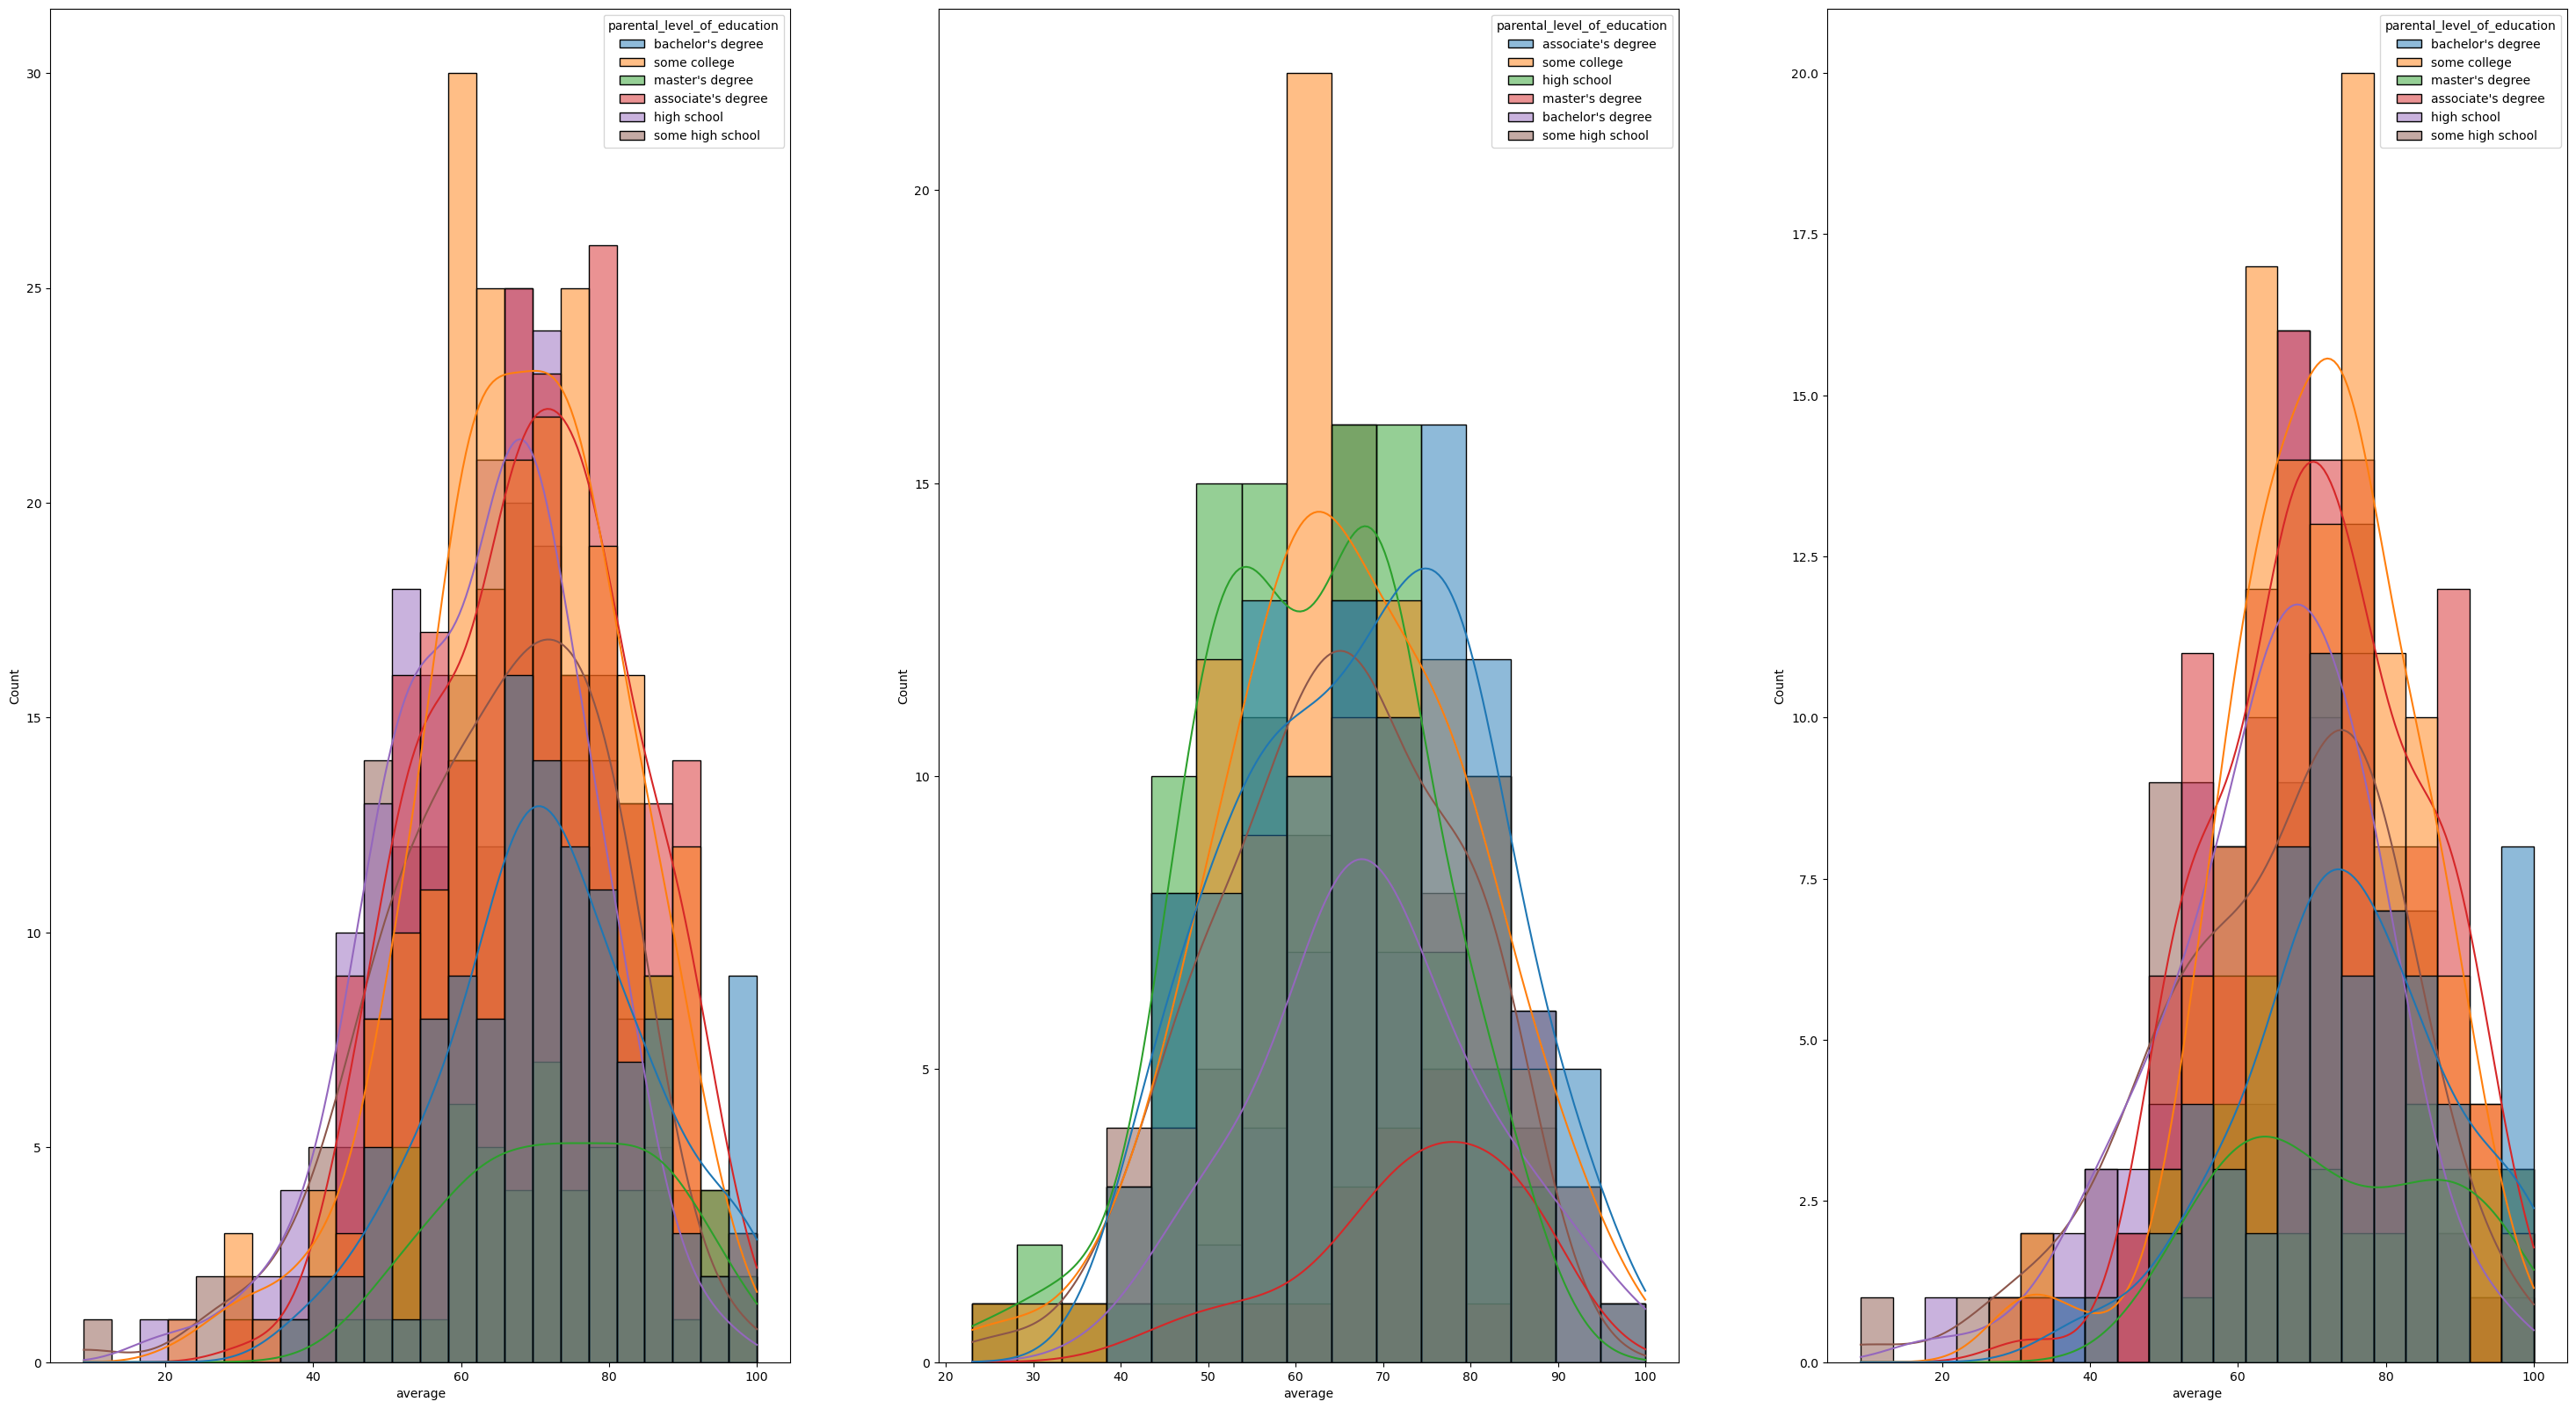

In [18]:
plt.subplots(1,3,figsize=(50,20))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

insights

In general parent's education dont help students perform well in exam


2nd plot shows that parents whose education is of associate's degree or master's degree their male child tend to perform well in the exam


3rd plot we can see that there is no effect of parent's education on female students

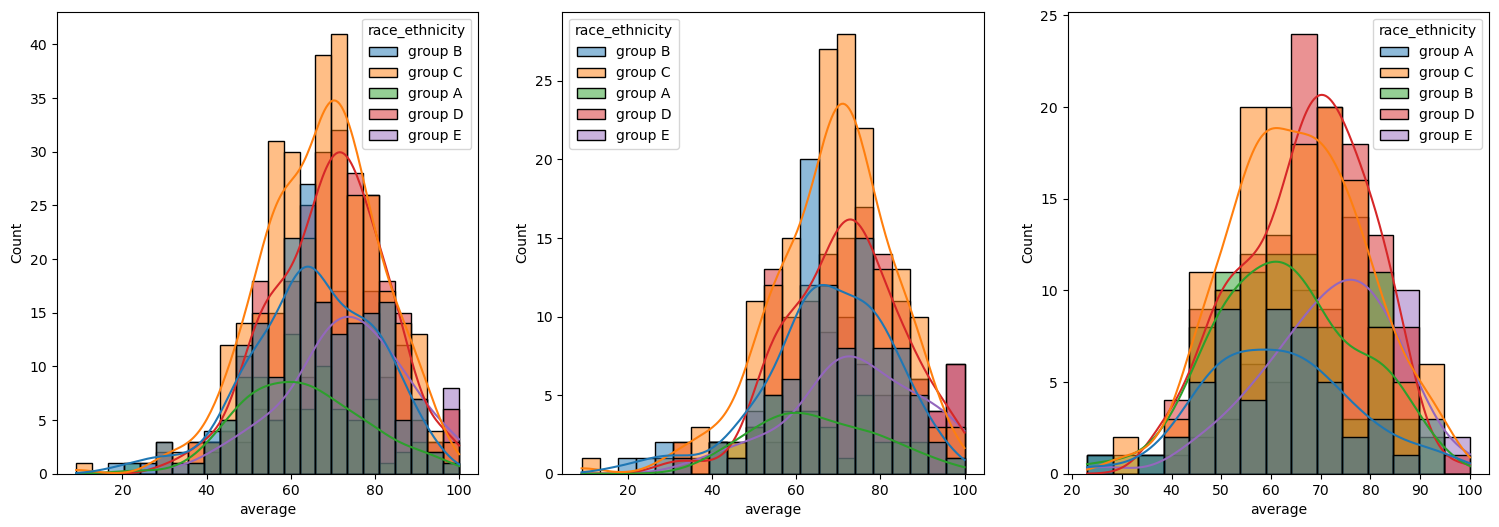

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

insights

students of group A and B does not perform well in the exam

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Maximum score of students in all 3 subjects

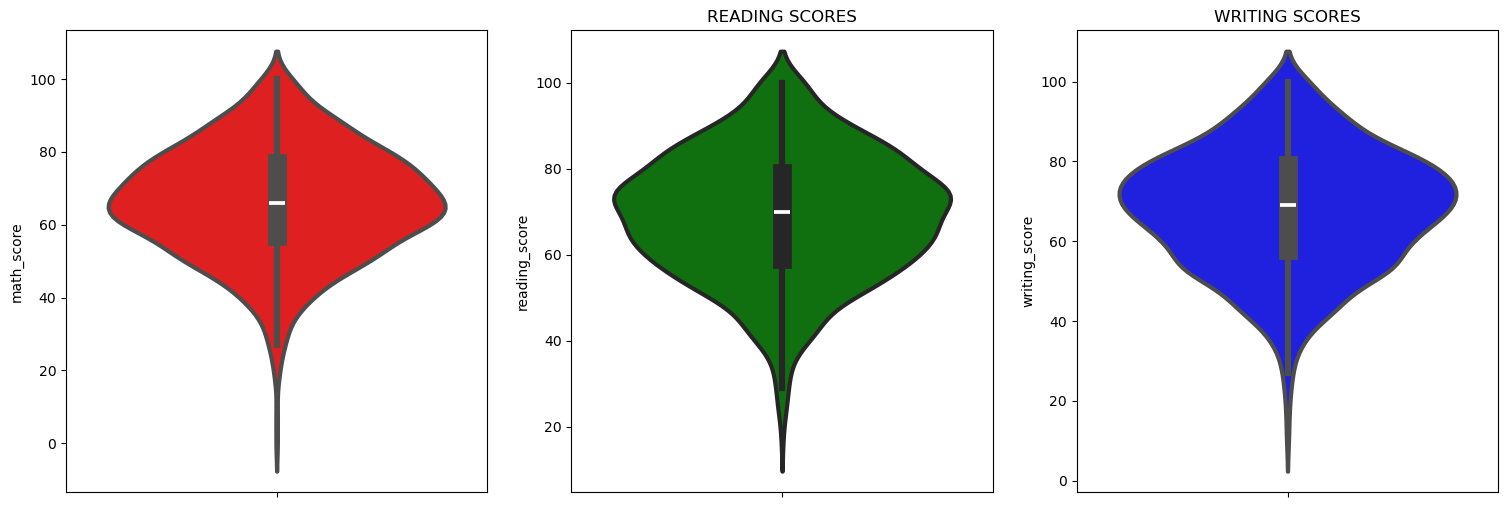

In [20]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights


From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

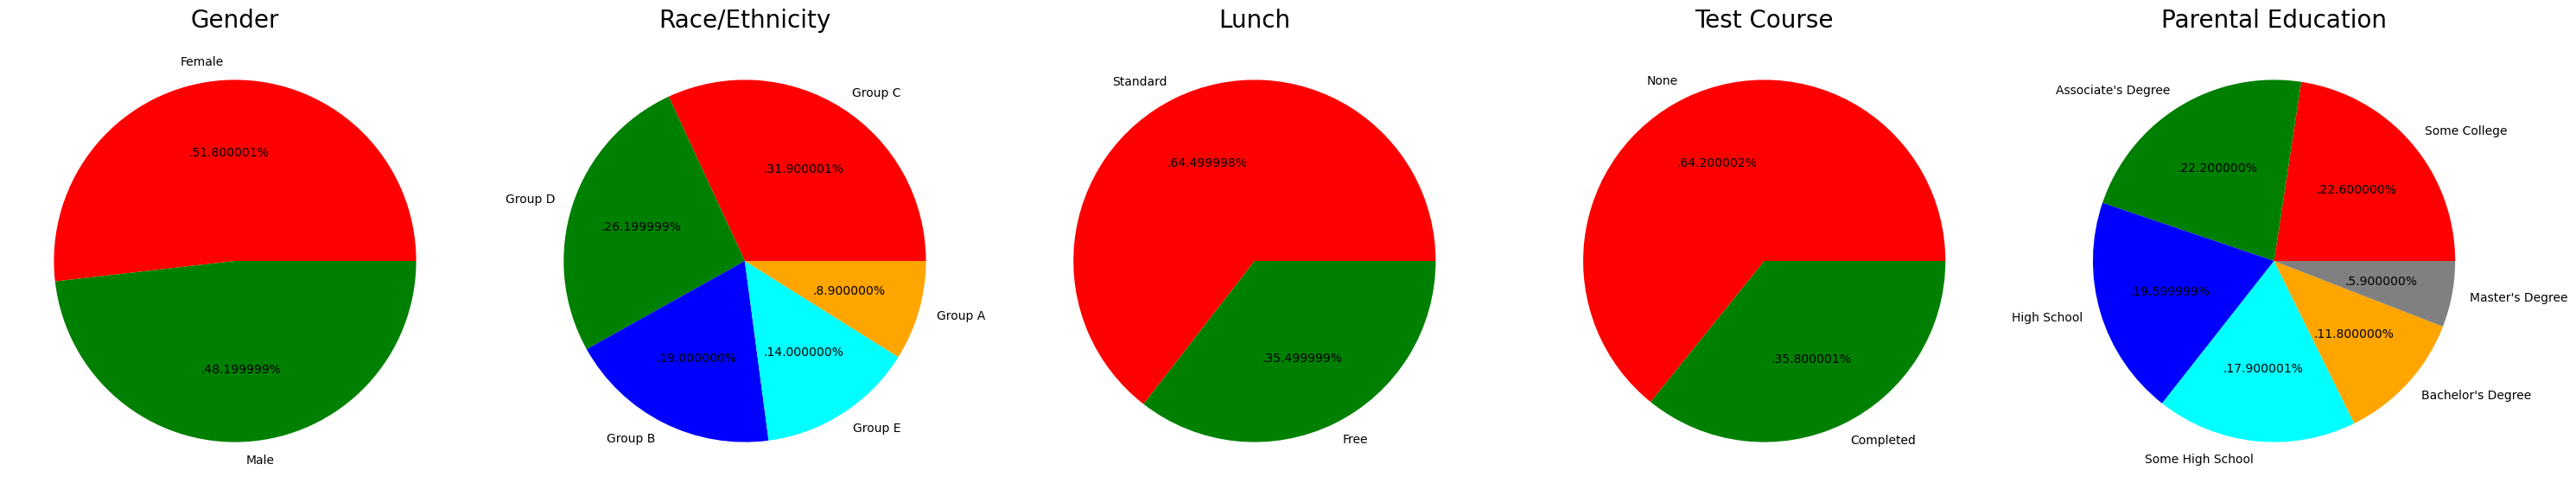

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights


Number of male and female students are same


Number students are greatest in Group C


Students had standard lunch are greater


Number of students who have not enrolled in any test preparation course is greater


Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


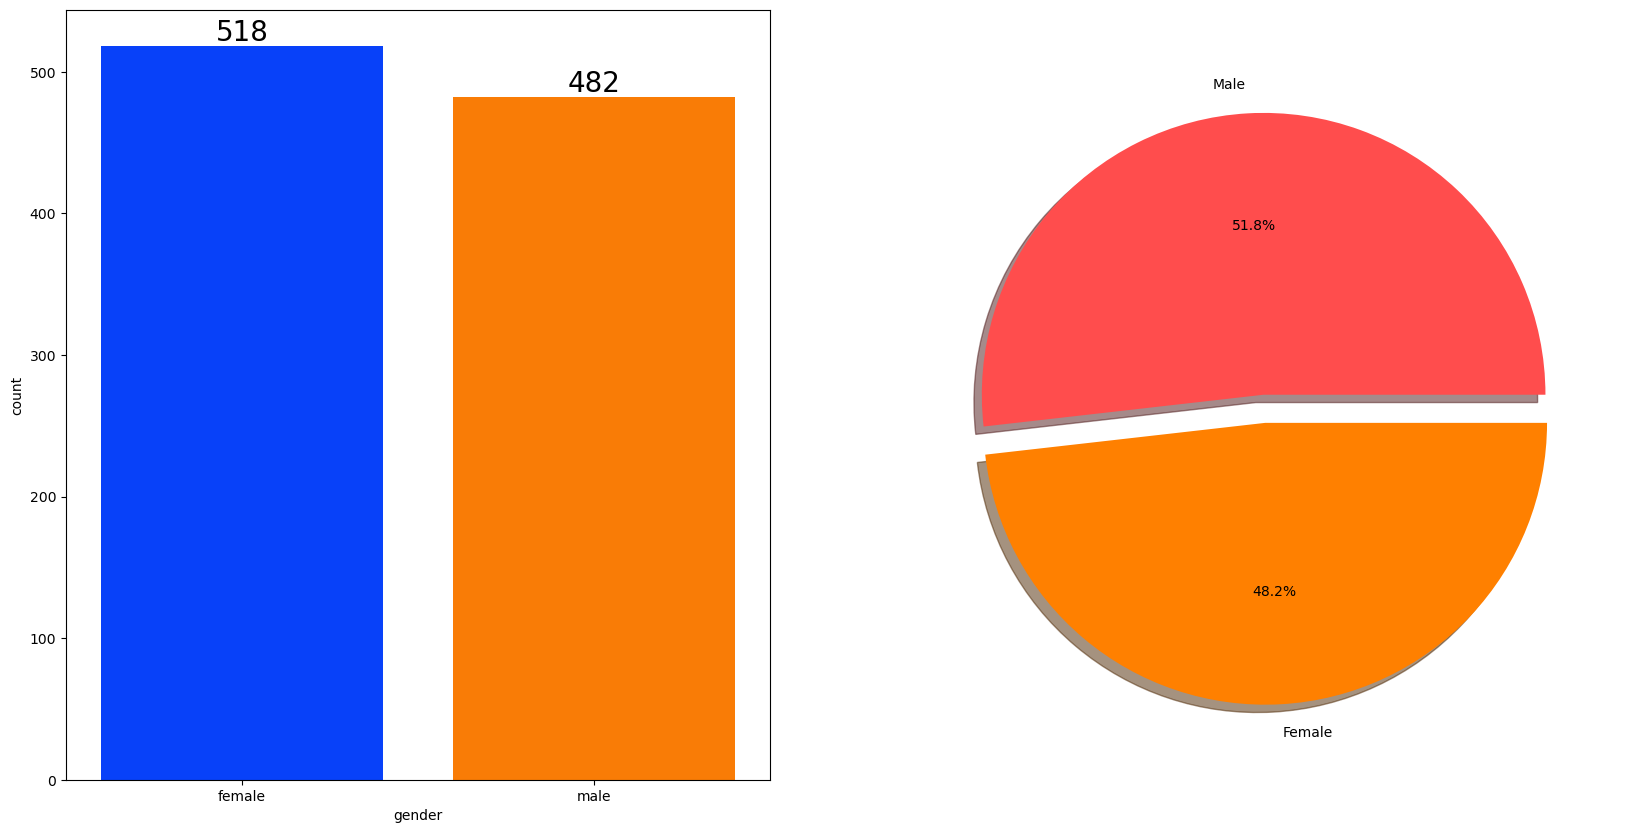

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights 


Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [26]:
gender_group = df.groupby('gender')

In [ ]:
plt.figure(figsize=(10,8))

x = ['Total Average','Math Average']

female_scores = [gender_group.mean()['average'][0]]

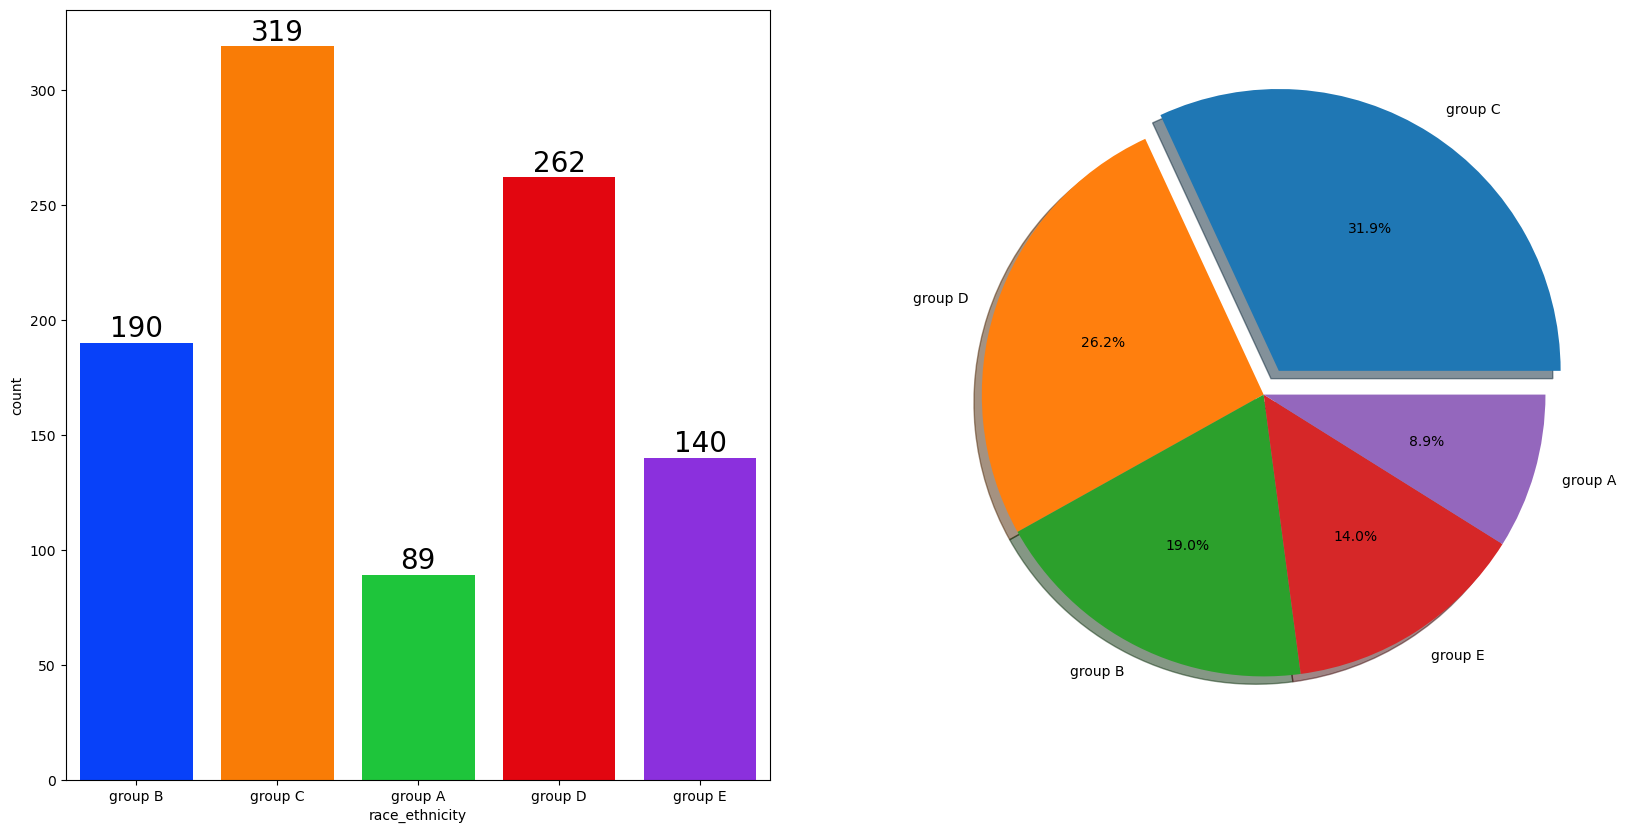

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

insights


Most of the students belonging from group C / group D

Lowest number of students belong to group A

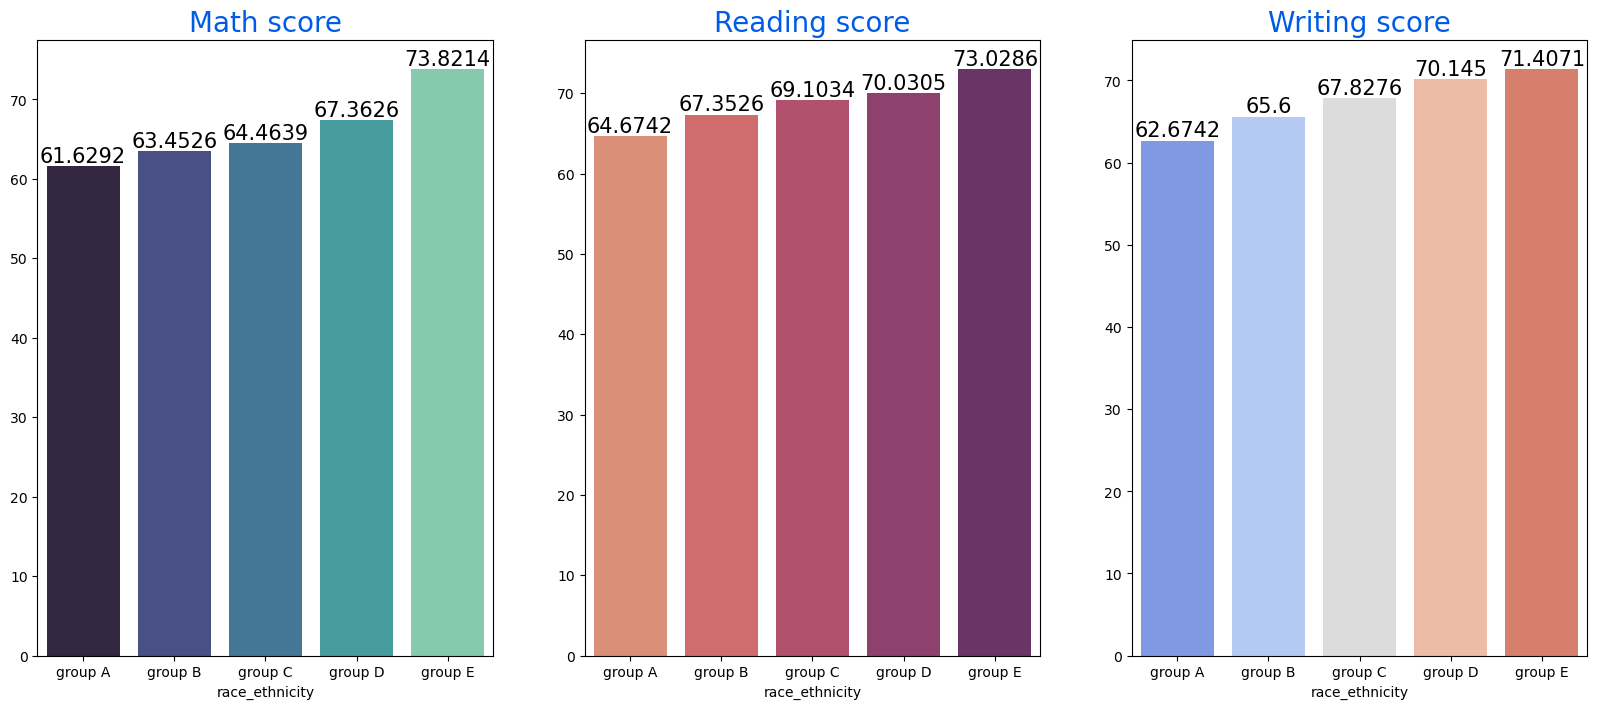

In [34]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

insights


Group E students have scored the highest marks

Group A students have scored the lowest marks


Students from lower socioeconomic status have lower avg in all course subjects

In [41]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

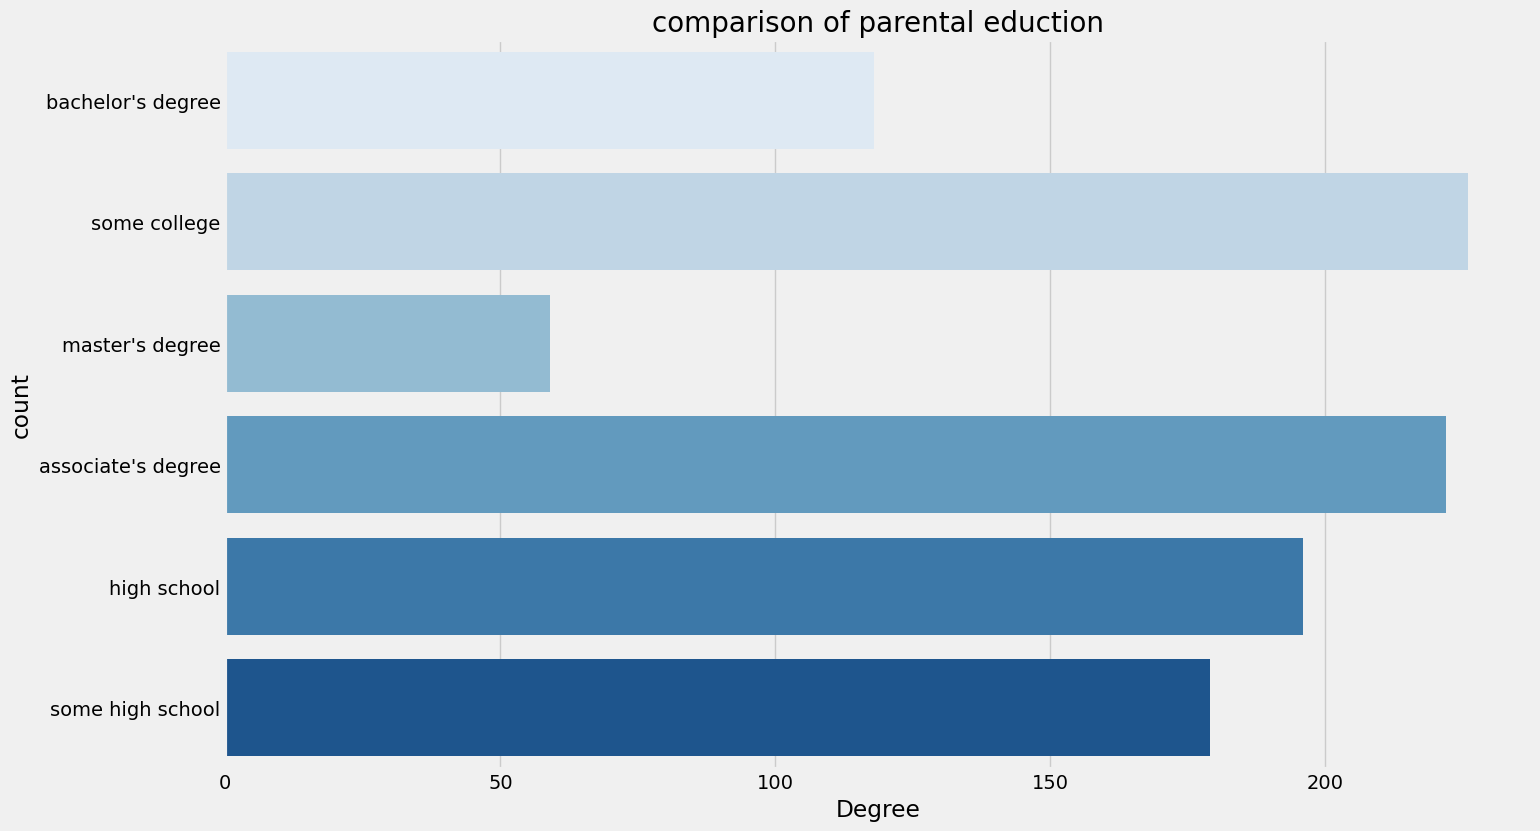

In [43]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette = 'Blues')
plt.title("comparison of parental eduction", fontweight=30,fontsize=20)
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

insights


Largest number of students are from some college

In [ ]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1) , loc=2,borderaxespad=0.)
plt.show()

Insights



the score of students whose parents possess matter and bachelor level eduction are higher than others

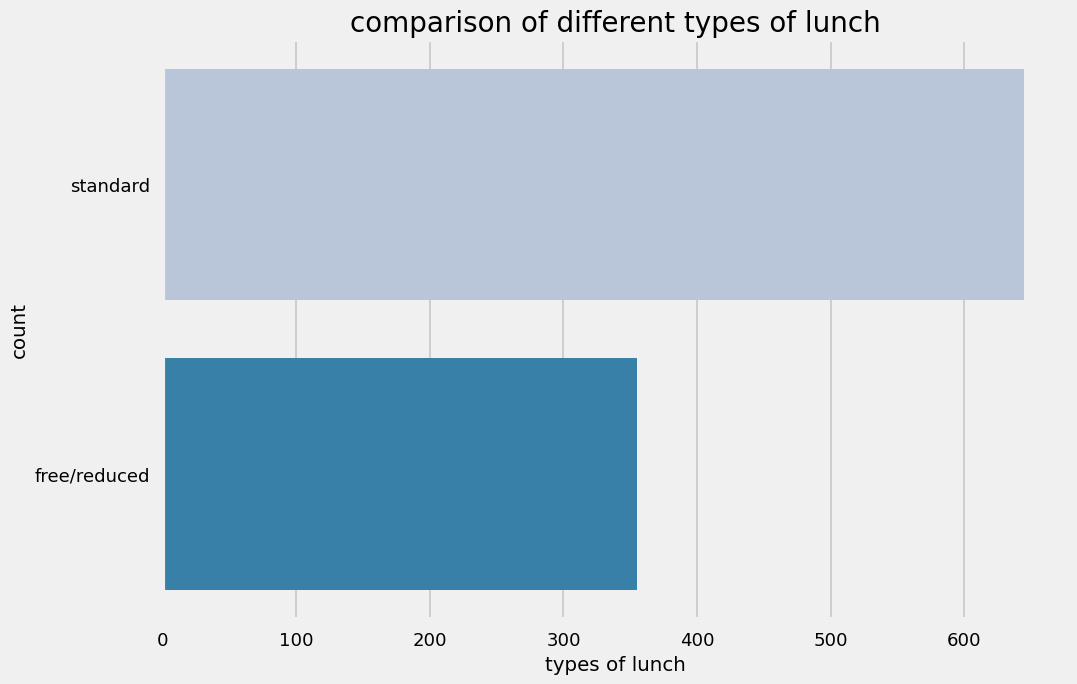

In [46]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('comparison of different types of lunch', fontweight = 30 , fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

insights



students being served standard lunch was more than free lunch

In [ ]:
f , ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x)